In [142]:
!pip install plotly
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from dateutil.parser import parse
from datetime import timedelta, datetime

Looking in indexes: https://pypi.org/simple, https://packagecloud.io/github/git-lfs/pypi/simple


In [191]:
df = pd.read_csv("flipkart.csv")

In [192]:
df.head()

,_id,company,url,model_number,model_name,color,display_size.cm,display_size.inch,resolution_type,operating_system,...,other.Other Features,other.FM Radio,other.Battery Type,other.Warranty Summary,feature_rating.Camera,feature_rating.Battery,feature_rating.Display,feature_rating.Value for Money,rating,price
0,5f340034dc5a4939850ac1b2,Mi,https://www.flipkart.com/redmi-8-sapphire-blue...,"[""MZB9123IN"",""MZB07R9IN"",""MZB8257IN""]",Redmi 8,Sapphire Blue,15.80,6.22,HD+,Android Pie 9,...,"AI Face Unlock, Dual App Support, Quick Chargi...",True,Li-polymer,Brand Warranty of 1 Year Available for Mobile ...,3.4,4.4,2.6,4.8,4.4,9999
1,5f340038dc5a4939850ac1b3,Mi,https://www.flipkart.com/redmi-k20-pro-carbon-...,"[""MZB7753IN""]",Redmi K20 Pro,Carbon Black,16.23,6.39,Full HD+,Android Pie 9.0,...,"Internal Memory - UFS2.1, USB Type C, QC 4.0, ...",NaN,NaN,Brand Warranty of 1 Year Available for Mobile ...,3.9,3.8,3.9,4.3,4.5,29999
2,5f34003adc5a4939850ac1b4,Mi,https://www.flipkart.com/redmi-note-6-pro-red-...,"[""M1806E7TI""]",Redmi Note 6 Pro,Red,15.90,6.26,Full HD+,Android Oreo 8.1,...,"Body - Metal Back, IR Blaster, Charger - 5V/2A...",NaN,NaN,Brand Warranty of 1 Year Available for Mobile ...,4.2,3.8,3.3,4.7,4.5,13990
3,5f34003ddc5a4939850ac1b5,Mi,https://www.flipkart.com/redmi-note-9-arctic-w...,"[""M2003J15SI""]",Redmi Note 9,Arctic White,16.59,6.53,Full HD+,Android Android Q 10,...,NaN,NaN,Lithium Polyme,1 year manufacturer warranty for device and 6 ...,NaN,NaN,NaN,NaN,4.4,14990
4,5f340042dc5a4939850ac1b6,Mi,https://www.flipkart.com/redmi-8a-dual-midnigh...,"[""M2001C3K3I""]",Redmi 8A Dual,Midnight Grey,15.80,6.22,Full HD+,Android Pie 9,...,NaN,NaN,lithium-ion,1 year manufacturer warranty for device and 6 ...,NaN,NaN,NaN,NaN,4.2,8149


In [193]:
df['company'].value_counts()

Samsung    18002
Mi          8343
Realme      5329
Vivo        5305
OPPO        5081
Name: company, dtype: int64

<AxesSubplot:xlabel='company', ylabel='price'>

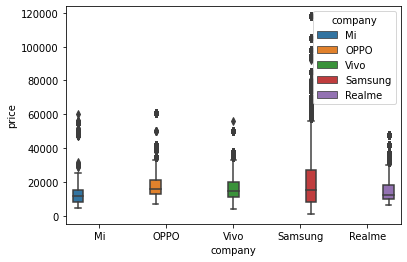

In [194]:
sns.boxplot(x='company', y='price',hue='company', data = df)

In [195]:
new_df = df[df['company']=='Mi']
new_df = new_df[~new_df['ram'].isin([1,2,3,4,6,8,16])]
temp = new_df[(new_df['model_name']=='Redmi Note 9 Pro')& (new_df['ram'] == '4')&(new_df['storage'] == '128') &(new_df['model_number']=='["M2003J6A1I"]')]
temp['ram'] = temp['ram'].astype(int)
temp['ist_date_time'] = pd.to_datetime(temp['ist_date_time'])
temp['price'] = temp['price'].astype(float)

<ipython-input-195-d5253af8c32a>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-195-d5253af8c32a>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-195-d5253af8c32a>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [196]:
fig = px.line(temp, x="ist_date_time", y="price", title='Life expectancy in Canada')
fig.update_layout()
fig.show()